In [1]:
require 'daru'
require 'daru_plotting_plotly'
require 'rbplotly'
require 'hg'

class Numeric
  def mili
    self.to_f * 10**(-3)
  end
  
  def micro
    self.to_f * 10**(-6)
  end
end

Daru.plotting_library = :plotly

:plotly

# 実験10

In [2]:
Daru::DataFrame.from_csv('data/jikken10.csv', encoding: 'UTF-8').tap do |df|
  df.plot(x: 'Ib', y: 'Ic', layout: {title: 'Ic'}).show
  df.plot(x: 'Ib', y: 'Vc', layout: {title: 'Vc'}).show
  df.plot(x: 'Ib', y: 'Pc', layout: {title: 'トランジスタの消費電力'}).show
  df.plot(x: 'Ib', y: 'Pl', layout: {title: '電球の消費電力'}).show
  df.plot(x: 'Ib', y: 'ef', layout: {title: '変換効率'}).show
end

#<Plotly::Offline::HTML:0x007f97b696ac30 @id="00c8488d-76c6-4a2a-9f07-53aabd589e0c", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.138, 0.133, 0.1179, 0.10300000000000001, 0.084, 0.0559, 0.028800000000000003, 0], :type=>:scatter, :mode=>"", :name=>"Ic"}], @layout={:width=>1000, :height=>500, :title=>"Ic"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b6c1a1b0 @id="00cf575f-d376-46fa-9c97-e3fa3100b522", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.2, 2.54, 10, 16.9, 24.2, 31.8, 34.3, 35.8], :type=>:scatter, :mode=>"", :name=>"Vc"}], @layout={:width=>1000, :height=>500, :title=>"Vc"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b6c33250 @id="0dd4222b-9ea4-4d5f-b1bb-ad8301ebecb3", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.027600000000000003, 0.33782, 1.179, 1.7407, 2.0328, 1.77762, 0.98784, 0.0], :type=>:scatter, :mode=>"", :name=>"Pc"}], @layout={:width=>1000, :height=>500, :title=>"トランジスタの消費電力"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b6c406f8 @id="8e7cc642-d222-49be-9848-c02d4f916a1f", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[4.9404, 4.4501800000000005, 3.0654000000000003, 1.9673000000000003, 0.9912000000000001, 0.23477999999999996, 0.04896000000000009, 0.0], :type=>:scatter, :mode=>"", :name=>"Pl"}], @layout={:width=>1000, :height=>500, :title=>"電球の消費電力"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b6c4be90 @id="c167d245-7d78-4a1e-9f7f-8ecfa2bc5a1a", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.9944444444444446, 0.9294444444444445, 0.7222222222222222, 0.5305555555555556, 0.3277777777777778, 0.11666666666666665, 0.0472222222222223, "NaN"], :type=>:scatter, :mode=>"", :name=>"ef"}], @layout={:width=>1000, :height=>500, :title=>"変換効率"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Daru::DataFrame(8x7)>
                    Ib         Ic         Vc       temp         Pc         Pl         ef
          0     0.0014      0.138        0.2        冷たい 0.02760000     4.9404 0.99444444
          1     0.0012      0.133       2.54        冷たい    0.33782 4.45018000 0.92944444
          2      0.001     0.1179         10        暖かい      1.179 3.06540000 0.72222222
          3     0.0008 0.10300000       16.9        暖かい     1.7407 1.96730000 0.53055555
          4     0.0006      0.084       24.2        暖かい     2.0328 0.99120000 0.32777777
          5     0.0004     0.0559       31.8        暖かい    1.77762 0.23477999 0.11666666
          6     0.0002 0.02880000       34.3        暖かい    0.98784 0.04896000 0.04722222
          7        0.0          0       35.8        暖かい        0.0        0.0        NaN

# 実験11

In [3]:
Daru::DataFrame.from_csv('data/jikken11.csv').tap do |df|
  df.plot(x: 'duty_ratio', y: 'Ic', layout: { title: 'コレクタ電流' }).show
  df.plot(x: 'duty_ratio', y: 'Vc', layout: { title: 'コレクタ電圧' }).show
  df.plot(x: 'duty_ratio', y: 'Pl', layout: { title: '負荷の消費電力' }).show
end
nil

#<Plotly::Offline::HTML:0x007f97b589f040 @id="c1cbffdb-96b5-4f34-81f1-db2440f9a16d", @data=[{:x=>[12, 22, 33, 50, 66, 76, 78, 88], :y=>[0.032, 0.0465, 0.0619, 0.0828, 0.10200000000000001, 0.1118, 0.114, 0.124], :type=>:scatter, :mode=>"", :name=>"Ic"}], @layout={:width=>1000, :height=>500, :title=>"コレクタ電流"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b6c790c0 @id="1836b966-da20-4618-84b5-f450e911a353", @data=[{:x=>[12, 22, 33, 50, 66, 76, 78, 88], :y=>[31, 27.7, 23.8, 17.5, 11.9, 8.9, 8, 4.81], :type=>:scatter, :mode=>"", :name=>"Vc"}], @layout={:width=>1000, :height=>500, :title=>"コレクタ電圧"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b58b7be0 @id="15dd6996-1873-4f3c-8c99-2fbed04798cb", @data=[{:x=>[12, 22, 33, 50, 66, 76, 78, 88], :y=>[1.1520000000000001, 1.674, 2.2283999999999997, 2.9808, 3.672, 4.0248, 4.104, 4.464], :type=>:scatter, :mode=>"", :name=>"Pl"}], @layout={:width=>1000, :height=>500, :title=>"負荷の消費電力"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

# 実験12

In [4]:
# 上り
Daru::DataFrame.from_csv('data/jikken_12_up.csv').tap do |df|
  df.vectors = Daru::Index.new(df.vectors.to_a.map(&:to_sym))
  df.add_vector :P, df[:Ia].to_a.zip(df[:Vak].to_a).map { |i, v| i * v }
  df.plot(x: :Ig, y: :Ia, layout: { title: "Ig - Ia", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Ia(A)' } }).show
  df.plot(x: :Ig, y: :Vak, layout: { title: "Ig - Vak", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Vak(V)' } }).show
  df.plot(x: :Ig, y: :P, layout: { title: "Ig - P", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'P(W)' } }).show
end
#下り
Daru::DataFrame.from_csv('data/jikken_12_down.csv').tap do |df|
  df.vectors = Daru::Index.new(df.vectors.to_a.map(&:to_sym))
  df.add_vector :P, df[:Ia].to_a.zip(df[:Vak].to_a).map { |i, v| i * v }
  df.plot(x: :Ig, y: :Ia, layout: { title: "Ig - Ia", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Ia(A)' } }).show
  df.plot(x: :Ig, y: :Vak, layout: { title: "Ig - Vak", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Vak(V)' } }).show
  df.plot(x: :Ig, y: :P, layout: { title: "Ig - P", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'P(W)' } }).show
end
nil

#<Plotly::Offline::HTML:0x007f97b6c99578 @id="83d9ff76-1dd0-454b-a030-61a43384ca65", @data=[{:x=>[0.002, 0.004, 0.006, 0.008, 0.009000000000000001, 0.009800000000000001, 0.012, 0.014, 0.016, 0.018000000000000002], :y=>[0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.1365, 0.137, 0.137, 0.137, 0.137], :type=>:scatter, :mode=>"", :name=>"Ia"}], @layout={:width=>1000, :height=>500, :title=>"Ig - Ia", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Ia(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b6200e18 @id="3131658c-ee86-472e-bd0c-535e77dd24c3", @data=[{:x=>[0.002, 0.004, 0.006, 0.008, 0.009000000000000001, 0.009800000000000001, 0.012, 0.014, 0.016, 0.018000000000000002], :y=>[36, 36, 36, 36, 36, 0.95, 0.95, 0.95, 0.95, 0.95], :type=>:scatter, :mode=>"", :name=>"Vak"}], @layout={:width=>1000, :height=>500, :title=>"Ig - Vak", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Vak(V)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b65b6738 @id="68f8094a-2dc8-421d-9a79-bf0bb4bac0bf", @data=[{:x=>[0.002, 0.004, 0.006, 0.008, 0.009000000000000001, 0.009800000000000001, 0.012, 0.014, 0.016, 0.018000000000000002], :y=>[0.014400000000000001, 0.014400000000000001, 0.014400000000000001, 0.014400000000000001, 0.014400000000000001, 0.129675, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002], :type=>:scatter, :mode=>"", :name=>:P}], @layout={:width=>1000, :height=>500, :title=>"Ig - P", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"P(W)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b58cc0b8 @id="3838f8ec-1980-4c15-8fa0-5d3528912fd5", @data=[{:x=>[0.018000000000000002, 0.016, 0.014, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002, 0.0], :y=>[0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137], :type=>:scatter, :mode=>"", :name=>"Ia"}], @layout={:width=>1000, :height=>500, :title=>"Ig - Ia", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Ia(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b65cccb8 @id="6cfc8e10-815f-44fd-8bc0-851e37414b08", @data=[{:x=>[0.018000000000000002, 0.016, 0.014, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002, 0.0], :y=>[0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], :type=>:scatter, :mode=>"", :name=>"Vak"}], @layout={:width=>1000, :height=>500, :title=>"Ig - Vak", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Vak(V)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b58e5838 @id="d4769c2c-5f8f-483c-835c-2952663531f8", @data=[{:x=>[0.018000000000000002, 0.016, 0.014, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002, 0.0], :y=>[0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002], :type=>:scatter, :mode=>"", :name=>:P}], @layout={:width=>1000, :height=>500, :title=>"Ig - P", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"P(W)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

# 実験13

In [5]:
Daru::DataFrame.from_csv('data/jikken_13.csv').tap do |df|
  df.vectors = Daru::Index.new(df.vectors.to_a.map(&:to_sym))
  df.plot(x: :Vak, y: :Ia, layout: { title: 'Ia - Vak', xaxis: { title: 'Vak(V)' }, yaxis: { title: 'Ia(A)' } }).show
end
nil

#<Plotly::Offline::HTML:0x007f97b71530f0 @id="81050a63-9ecc-4524-b45f-436a5f4ef642", @data=[{:x=>[0.77, 0.76, 0.758, 0.754, 0.778, 0.81, 0.8, 0.81, 1.84, 1.75, 1.58, 1.38, 1.19, 0.98, 0.8, 0.6, 0.4, 0.2, 0.1], :y=>[0.0684, 0.06, 0.0489, 0.04020000000000001, 0.0282, 0.0249, 0.024300000000000002, 0.023780000000000003, 0.0009000000000000001, 0.0009000000000000001, 0.0009000000000000001, 0.0005, 0.00045000000000000004, 0.0004, 0.00034, 0.00024, 0.0002, 0.00013000000000000002, 0.0001], :type=>:scatter, :mode=>"", :name=>"Ia"}], @layout={:width=>1000, :height=>500, :title=>"Ia - Vak", :xaxis=>{:title=>"Vak(V)"}, :yaxis=>{:title=>"Ia(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

## Vakのターンオン時

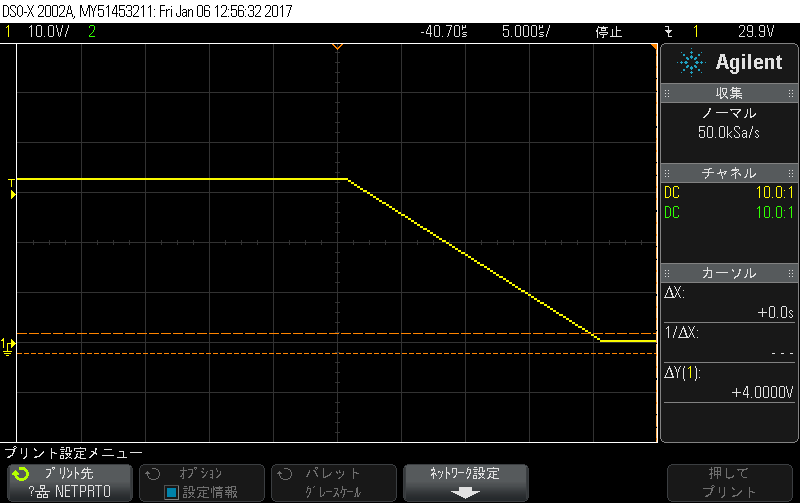

In [6]:
File.open('data/Vak_turn_on.png')

## Iaのターンオン時
### 全体

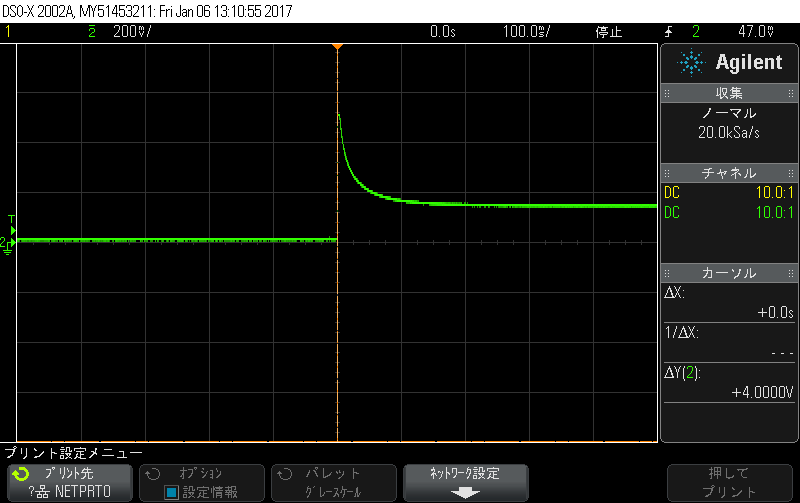

In [7]:
File.open('data/Ia_turn_on_1.png')

### 拡大

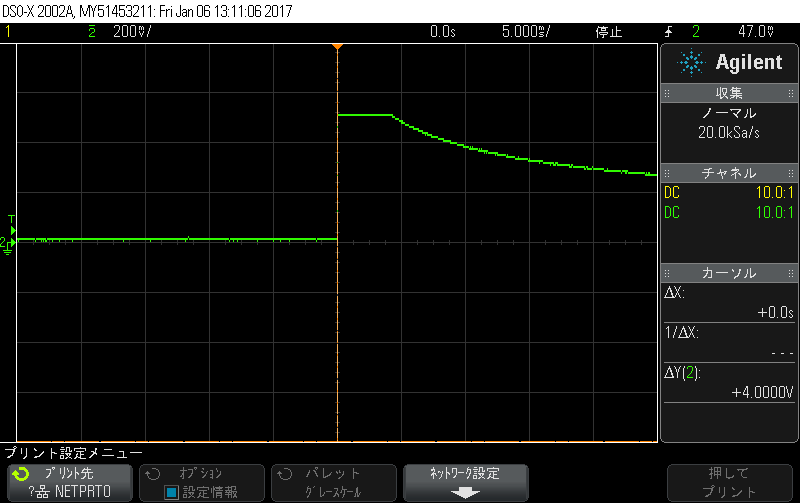

In [8]:
File.open('data/Ia_turn_on_2.png')

# 実験14

In [9]:
Daru::DataFrame.from_csv('data/jikken_14.csv').tap do |df|
  df.vectors = Daru::Index.new(df.vectors.to_a.map(&:to_sym))
  half_period = 4.0
  df[:alpha] = df[:length].to_a.map { |it| it / half_period * Math::PI }
  df.plot(x: :alpha, y: :V, layout: { title: 'alpha - V', xaxis: { title: 'alpha' }, yaxis: { title: 'V(V)' } }).show
  df.plot(x: :alpha, y: :I, layout: { title: 'alpha - I', xaxis: { title: 'alpha' }, yaxis: { title: 'I(A)' } }).show
end
nil

#<Plotly::Offline::HTML:0x007f97b6ce8b78 @id="97987694-23ea-42f5-a87f-98b09dac650b", @data=[{:x=>[0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069], :y=>[103.0, 99.0, 90.5, 77.0, 55.0, 32.5, 10.0], :type=>:scatter, :mode=>"", :name=>"V"}], @layout={:width=>1000, :height=>500, :title=>"alpha - V", :xaxis=>{:title=>"alpha"}, :yaxis=>{:title=>"V(V)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007f97b590d568 @id="ddb9ea31-937b-4959-93ec-147fa35fdbde", @data=[{:x=>[0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069], :y=>[0.25, 0.245, 0.23, 0.21, 0.179, 0.138, 0.082], :type=>:scatter, :mode=>"", :name=>"I"}], @layout={:width=>1000, :height=>500, :title=>"alpha - I", :xaxis=>{:title=>"alpha"}, :yaxis=>{:title=>"I(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

# 実験15

## フーリエ級数展開

In [10]:
dt = 1/2000.0 * 2 * Math::PI
['0.25', '0.5', '0.6', '0.75'].each do |name|
  Daru::DataFrame.from_csv("data/jikken15/#{name}.csv").tap do |df|
    df.map_rows! { |row| row['Volt'] = row['Volt'] || 0.0 ; row  }
    df.add_vector :x, df.index.to_a.map { |it| it.to_f * dt }
  end.tap do |df|
    degree = 21
    a0 = (2.0/(1999*dt)) * dt * df['Volt'].sum
    a = (1..degree).map do |n|
      1 / Math::PI * df.map_rows do |row|
        Math.cos(n * row[:x]) * row['Volt'] * dt
      end.reduce(:+)
    end
    b = (1..degree).map do |n|
      1 / Math::PI * df.map_rows do |row|
        Math.sin(n * row[:x]) * row['Volt'] * dt
      end.reduce(:+)
    end
    xs = (0..1999).to_a.map {|i| i * dt }
    ys = xs.map { |i| a0 + (1..N).map { |n| a[n - 1] * Math.cos(n * i) + b[n - 1] * Math.sin(n * i) }.reduce(:+) }
    Plotly::Plot.new(data: [
      { x: xs , y: ys, name: 'フーリエ級数から復元した波形' },
      { x: df[:x].to_a, y: df['Volt'].to_a, name: '元の波形' }
      ], layout: {
        xaxis: { title: '位相' },
        yaxis: { title: '電圧' },
        title: "α = #{name}π"
        }).show
  end
end
nil

ArgumentError: bad value for range

## オシロスコープの画像

## $\alpha = 0.25 \pi$

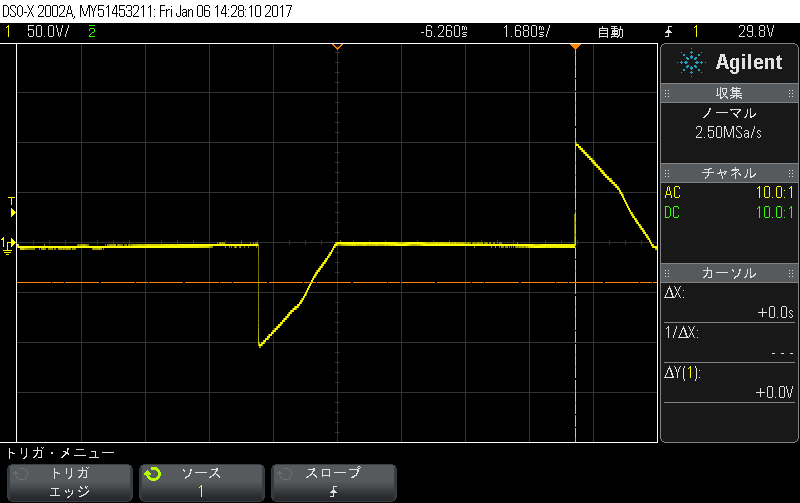

In [11]:
File.open('data/jikken15/0.25.png')

## $\alpha = 0.5 \pi$

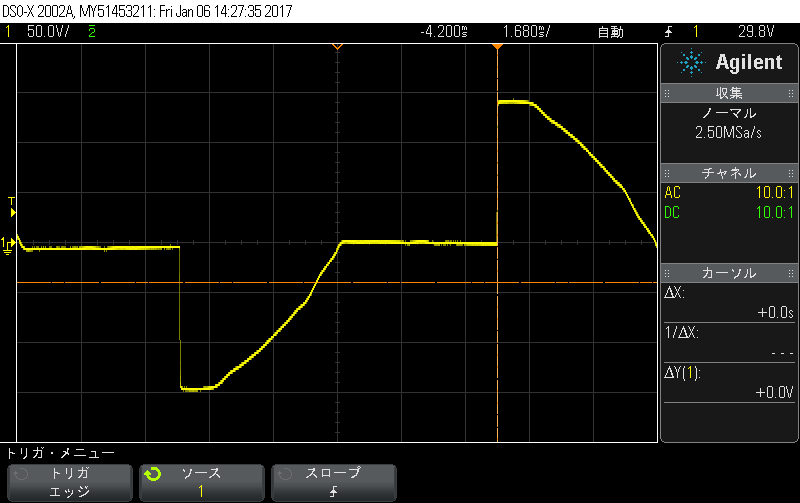

In [12]:
File.open('data/jikken15/0.5.png')

## $\alpha = 0.6 \pi$

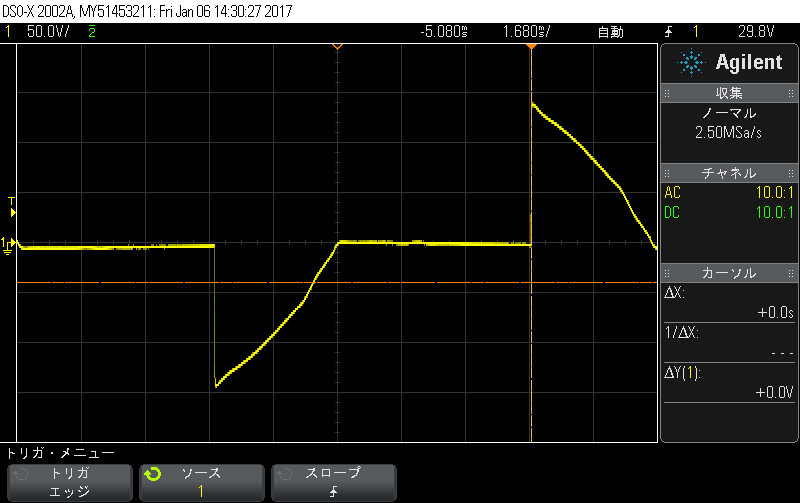

In [13]:
File.open('data/jikken15/0.6.png')

## $\alpha = 0.75 \pi$

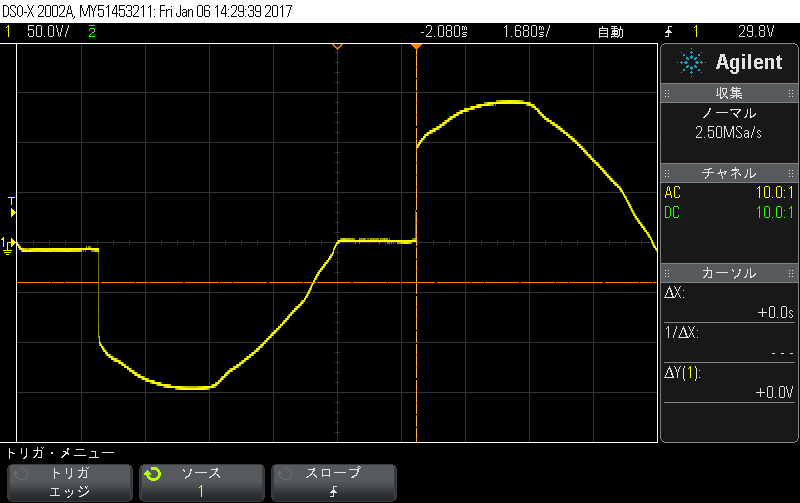

In [14]:
File.open('data/jikken15/0.75.png')